In [1]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from scipy.stats import mode
from random import randrange
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math
import operator
from scipy.stats import mode
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import mode
from sklearn.neighbors import KNeighborsClassifier
import numpy

In [2]:
data = pd.read_csv("diamonds.csv")

In [3]:
data.shape

(53940, 10)

In [4]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [6]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
data.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In [9]:
print(f"There are {data.duplicated().sum()} duplicate rows in the data set.")

There are 146 duplicate rows in the data set.


In [10]:
data=data.drop_duplicates()
print("The duplicate rows are removed.")

The duplicate rows are removed.


In [11]:
data.shape

(53794, 10)

In [12]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [13]:
# Store categorical and numerical attribute name
num_attr = ["carat","depth","table","price","x","y","z"]
cat_attr = ["cut","color","clarity"]

In [14]:
# Convert all attribute to appropriate type
data[cat_attr] = data[cat_attr].astype('category')

In [15]:
data[num_attr] = data[num_attr].astype('float')

In [16]:
# checking data types after conversion
data.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price       float64
x           float64
y           float64
z           float64
dtype: object

In [17]:
cut = set(data['cut'])
print(cut)

{'Premium', 'Ideal', 'Very Good', 'Good', 'Fair'}


In [18]:
# Mapping the values
data['cut'] = data['cut'].map({'Very Good': 0, 'Fair': 1, 'Good': 2, 'Premium': 3, 'Ideal': 4}).astype(int)

In [19]:
color = set(data['color'])
print(color)

{'G', 'D', 'I', 'F', 'J', 'E', 'H'}


In [20]:
data['color'] = data['color'].map({'E': 0, 'H': 1, 'I': 2, 'J': 3, 'F': 4, 'D': 5, 'G':6}).astype(int)

In [21]:
clarity = set(data['clarity'])
print(clarity)

{'SI1', 'VS1', 'IF', 'VS2', 'I1', 'VVS2', 'SI2', 'VVS1'}


In [22]:
data['clarity'] = data['clarity'].map({'VS2': 0, 'VVS2': 1, 'VVS1': 2, 'VS1': 3, 'SI1': 4, 'IF': 5, 'SI2':6, 'I1': 7}).astype(int)

In [23]:
data.loc()

In [24]:


len(data[(data['x']==0) | (data['y']==0) | (data['z']==0)])



19

In [25]:
data = data[(data[['x','y','z']] != 0).all(axis=1)]

# Just to Confirm
data.loc[(data['x']==0) | (data['y']==0) | (data['z']==0)]



,carat,cut,color,clarity,depth,table,price,x,y,z


<AxesSubplot:>

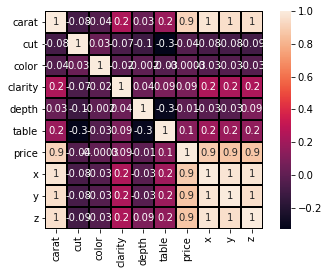

In [26]:


# Correlation Map
corr = data.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True, linewidths=1, linecolor='black',fmt='.0g')



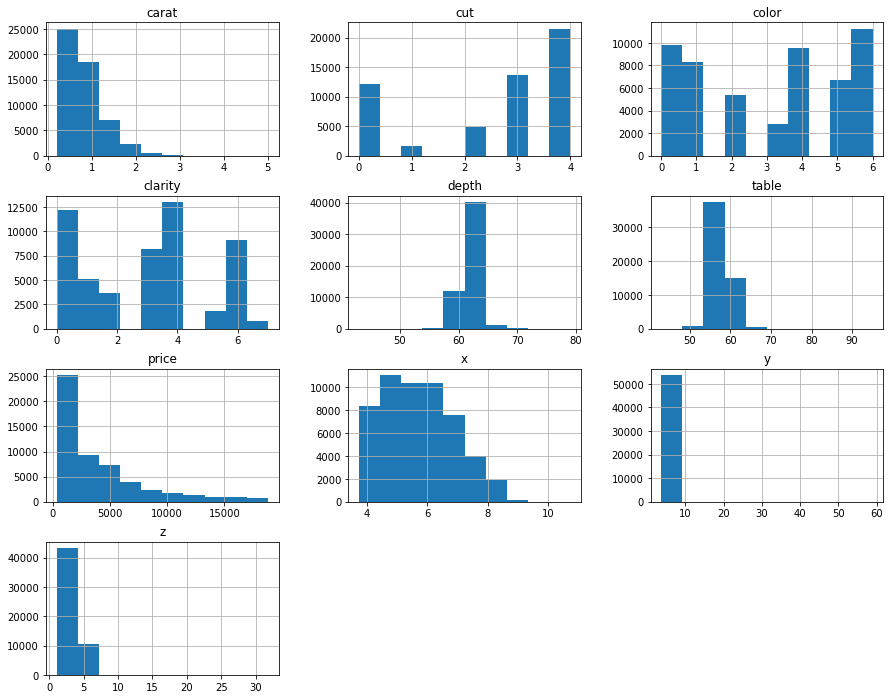

In [27]:
# Univariate Analysis
data.hist(figsize=(15,12));

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


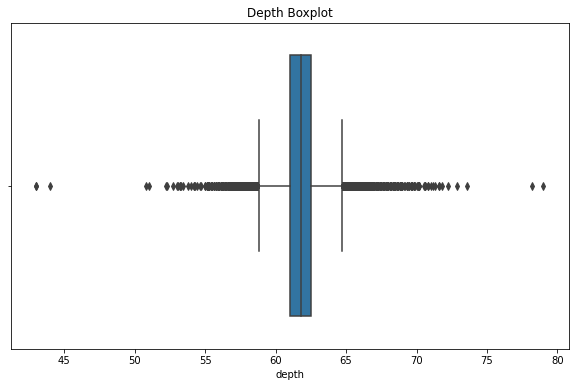

In [28]:
# Box Plot
fig = plt.figure(figsize=(10,6))
sns.boxplot(data.depth)
plt.title('Depth Boxplot')
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


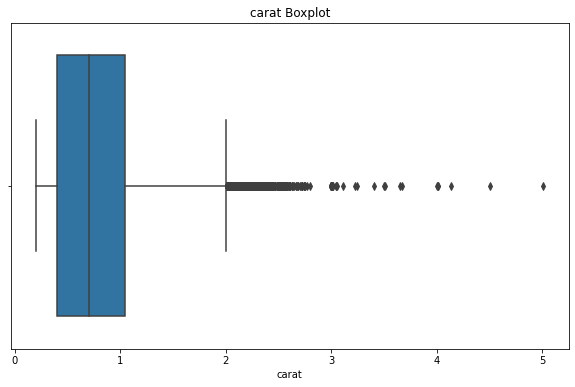

In [29]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data.carat)
plt.title('carat Boxplot')
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


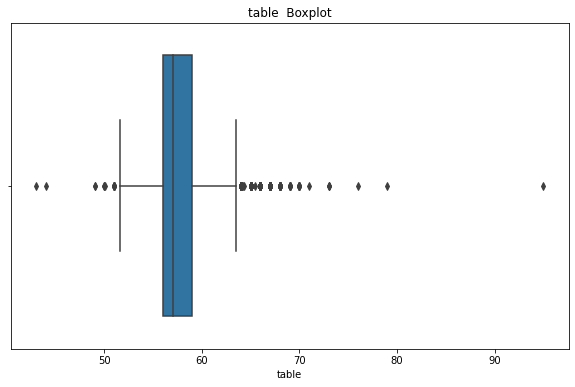

In [30]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data.table)
plt.title('table  Boxplot')
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


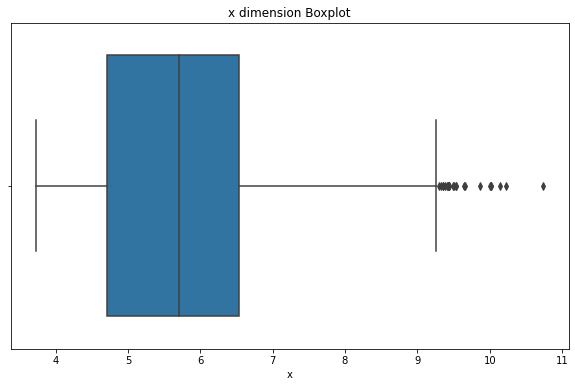

In [31]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data.x)
plt.title('x dimension Boxplot')
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


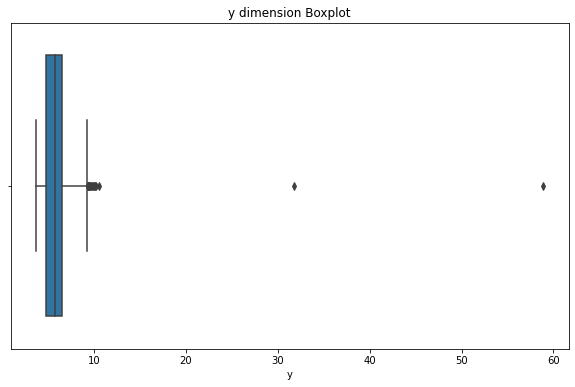

In [32]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data.y)
plt.title('y dimension Boxplot')
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


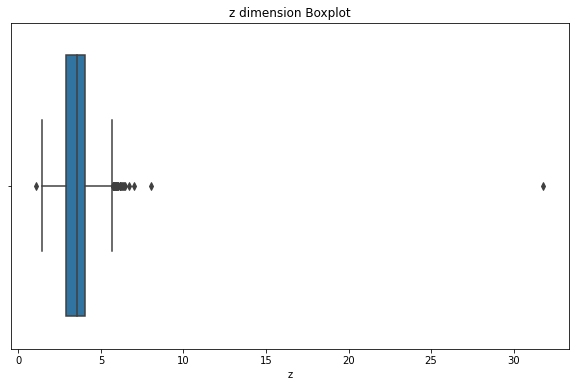

In [33]:


fig = plt.figure(figsize=(10,6))
sns.boxplot(data.z)
plt.title('z dimension Boxplot')
plt.show()



In [34]:
# finding the boundary values


print("Highest allowed",data['depth'].mean() + 3*data['depth'].std())
print("Lowest allowed",data['depth'].mean() - 3*data['depth'].std())



Highest allowed 66.03715041370982
Lowest allowed 57.45931448633513


In [35]:
# finding the outliers

data[(data['depth'] > 65.65) | (data['depth'] < 56.94)]



,carat,cut,color,clarity,depth,table,price,x,y,z
2,0.23,2,0,3,56.9,65.0,327.0,4.05,4.07,2.31
91,0.86,1,0,6,55.1,69.0,2757.0,6.45,6.33,3.52
97,0.96,1,4,6,66.3,62.0,2759.0,6.27,5.95,4.07
129,0.91,1,1,6,65.7,60.0,2763.0,6.03,5.99,3.95
204,0.98,1,1,6,67.9,60.0,2777.0,6.05,5.97,4.08
...,...,...,...,...,...,...,...,...,...,...
53727,0.78,1,0,6,66.9,57.0,2721.0,5.70,5.66,3.60
53756,0.84,1,6,3,55.6,64.0,2724.0,6.42,6.32,3.54
53757,0.72,1,4,0,55.4,64.0,2724.0,6.06,5.97,3.34
53800,0.90,1,2,3,68.7,62.0,2732.0,5.83,5.79,3.99


In [36]:
# Trimming of Outliers
data = data[(data['depth'] < 65.65) & (data['depth'] > 56.94)]
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,0,6,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,3,0,4,59.8,61.0,326.0,3.89,3.84,2.31
3,0.29,3,2,0,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,2,3,6,63.3,58.0,335.0,4.34,4.35,2.75
5,0.24,0,3,1,62.8,57.0,336.0,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,5,4,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,2,5,4,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,0,5,4,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,3,1,6,61.0,58.0,2757.0,6.15,6.12,3.74


In [37]:

# Caping of Outliers
upper_limit = data['depth'].mean() + 3*data['depth'].std()
lower_limit = data['depth'].mean() - 3*data['depth'].std()

In [38]:
data['depth'] = np.where(
    data['depth']>upper_limit,
    upper_limit,
    np.where(
        data['depth']<lower_limit,
        lower_limit,
        data['depth']
    )
)

In [39]:


data.describe()



,carat,cut,color,clarity,depth,table,price,x,y,z
count,53075.000000,53075.000000,53075.000000,53075.000000,53075.000000,53075.000000,53075.000000,53075.000000,53075.000000,53075.000000
mean,0.794155,2.594988,3.104682,2.918191,61.721670,57.437232,3928.202694,5.724741,5.729016,3.534155
std,0.471195,1.565877,2.216154,2.139239,1.274434,2.201105,3991.767599,1.118518,1.140136,0.700109
min,0.200000,0.000000,0.000000,0.000000,57.874047,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,2.000000,1.000000,1.000000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,4.000000,3.000000,61.800000,57.000000,2393.000000,5.690000,5.700000,3.520000
75%,1.040000,4.000000,5.000000,4.000000,62.500000,59.000000,5330.000000,6.540000,6.530000,4.030000
max,5.010000,4.000000,6.000000,7.000000,65.564822,95.000000,18823.000000,10.740000,58.900000,31.800000


In [40]:

# finding the boundary values
print("Highest allowed",data['carat'].mean() + 3*data['carat'].std())
print("Lowest allowed",data['carat'].mean() - 3*data['carat'].std())



Highest allowed 2.207739461904197
Lowest allowed -0.6194293347257378


In [41]:


data[(data['carat'] > 2.20) | (data['depth'] < -0.61)]



,carat,cut,color,clarity,depth,table,price,x,y,z
16283,3.00,0,1,7,63.1,55.0,6512.0,9.23,9.10,5.77
16341,2.21,3,1,7,62.2,58.0,6535.0,8.31,8.27,5.16
17466,2.23,0,6,7,63.5,57.0,7006.0,8.24,8.20,5.22
17560,2.25,1,6,7,64.9,58.0,7069.0,8.15,8.12,5.28
17897,2.30,3,6,7,60.2,59.0,7226.0,8.71,8.56,5.19
...,...,...,...,...,...,...,...,...,...,...
27726,2.36,3,1,6,59.4,58.0,18745.0,8.69,8.75,5.18
27727,2.61,4,2,6,62.1,56.0,18756.0,8.85,8.73,5.46
27731,2.55,3,2,3,61.8,62.0,18766.0,8.70,8.65,5.36
27744,2.29,3,2,4,61.8,59.0,18797.0,8.52,8.45,5.24


In [42]:


data = data[(data['carat'] < 2.20) & (data['carat'] > -0.61)]
data



,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,0,6,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,3,0,4,59.8,61.0,326.0,3.89,3.84,2.31
3,0.29,3,2,0,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,2,3,6,63.3,58.0,335.0,4.34,4.35,2.75
5,0.24,0,3,1,62.8,57.0,336.0,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,5,4,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,2,5,4,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,0,5,4,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,3,1,6,61.0,58.0,2757.0,6.15,6.12,3.74


In [43]:


data['volume'] = data['x'] * data['y'] * data['z']
data.head()



<ipython-input-43-c41c837c2ead>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['volume'] = data['x'] * data['y'] * data['z']


,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,4,0,6,61.5,55.0,326.0,3.95,3.98,2.43,38.202030
1,0.21,3,0,4,59.8,61.0,326.0,3.89,3.84,2.31,34.505856
3,0.29,3,2,0,62.4,58.0,334.0,4.20,4.23,2.63,46.724580
4,0.31,2,3,6,63.3,58.0,335.0,4.34,4.35,2.75,51.917250
5,0.24,0,3,1,62.8,57.0,336.0,3.94,3.96,2.48,38.693952


In [44]:


data.drop(['x','y','z'], axis=1, inplace= True)



C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [45]:


data.head()



,carat,cut,color,clarity,depth,table,price,volume
0,0.23,4,0,6,61.5,55.0,326.0,38.202030
1,0.21,3,0,4,59.8,61.0,326.0,34.505856
3,0.29,3,2,0,62.4,58.0,334.0,46.724580
4,0.31,2,3,6,63.3,58.0,335.0,51.917250
5,0.24,0,3,1,62.8,57.0,336.0,38.693952


In [49]:


num_attr = ['carat','depth','table','price','volume']



In [50]:


cat_attr = ['cut','color','clarity']



In [51]:


data[cat_attr] = data[cat_attr].astype('category')



C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [46]:
#Splitting the data
y=data["price"]
X=data.drop("price", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=123)  

In [48]:
# Convert categorical to numerical

cat_attr = X_train.select_dtypes(include=['category']).columns
cat_attr



Index([], dtype='object')

In [52]:


print(y_train.value_counts(normalize=True)*100)
print("\n")
print(y_test.value_counts(normalize=True)*100)



605.0      0.249448
625.0      0.244696
802.0      0.239945
544.0      0.228066
789.0      0.225691
             ...   
15804.0    0.002376
7352.0     0.002376
9872.0     0.002376
12013.0    0.002376
13263.0    0.002376
Name: price, Length: 10379, dtype: float64


776.0      0.313569
828.0      0.294565
698.0      0.275561
984.0      0.266059
605.0      0.256556
             ...   
3496.0     0.009502
16694.0    0.009502
4911.0     0.009502
9810.0     0.009502
5867.0     0.009502
Name: price, Length: 5167, dtype: float64


In [53]:
# Convertcategorical to numerical

cat_attr = X_train.select_dtypes(include=['category']).columns
cat_attr



Index([], dtype='object')

In [54]:


# Using OneHotEncoder, converting Categorical attributes to Numeric attributes
enc = OneHotEncoder(drop = 'first')

enc.fit(X_train[cat_attr])



OneHotEncoder(drop='first')

In [55]:


col_names = enc.get_feature_names()



In [56]:
col_names

array([], dtype=object)

In [57]:


X_train_ohe=enc.transform(X_train[cat_attr]).toarray()
X_test_ohe=enc.transform(X_test[cat_attr]).toarray()



In [58]:


X_train_ohe[0:10]



array([], shape=(10, 0), dtype=float64)

In [59]:

# Using StandardScaler, standardize the numerical attributes
num_attr = ['carat','depth','table','volume']

In [60]:


scaler = StandardScaler()
scaler.fit(X_train[num_attr])



StandardScaler()

In [61]:
X_train_std = scaler.transform(X_train[num_attr])
X_test_std = scaler.transform(X_test[num_attr])

In [62]:


print(X_train_std.shape)
print(X_test_std.shape)



(42093, 4)
(10524, 4)


In [64]:
# Concatenate attribute

X_train_con = np.concatenate([X_train_std, X_train_ohe], axis=1)
X_test_con = np.concatenate([X_test_std, X_test_ohe], axis=1)



In [65]:


X_train_con.shape



(42093, 4)

In [66]:


X_test_con.shape



(10524, 4)

In [67]:
print(pd.value_counts(y_train))
print(pd.value_counts(y_test))

605.0      105
625.0      103
802.0      101
544.0       96
789.0       95
          ... 
15804.0      1
7352.0       1
9872.0       1
12013.0      1
13263.0      1
Name: price, Length: 10379, dtype: int64
776.0      33
828.0      31
698.0      29
984.0      28
605.0      27
           ..
3496.0      1
16694.0     1
4911.0      1
9810.0      1
5867.0      1
Name: price, Length: 5167, dtype: int64


In [68]:

# Modelling
from sklearn.neighbors import KNeighborsRegressor



In [69]:


model= KNeighborsRegressor( )
model.fit(X_train_con, y_train)



KNeighborsRegressor()

In [70]:


train_pred = model.predict(X_train_con)
test_pred = model.predict(X_test_con)



In [71]:
# Evaluation
print("The Mean Absolute Error on train dataset: {} \n".format(mean_absolute_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Absolute Error on test dataset: {} \n".format(mean_absolute_error(y_pred=test_pred,y_true=y_test)))

print("The Mean Squared Error on train dataset: {} \n".format(mean_squared_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Squared Error on test dataset: {} \n".format(mean_squared_error(y_pred=test_pred,y_true=y_test)))

print("The Root Mean Squared Error on train dataset: {} \n".format(math.sqrt(mean_squared_error(y_pred=train_pred,y_true=y_train))))
print("The Root Mean Squared Error on test dataset: {} \n".format(math.sqrt(mean_squared_error(y_pred=test_pred,y_true=y_test))))

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("The Mean Absolute Percentage Error on train dataset: {} \n".format(mean_absolute_percentage_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Absolute Percentage Error on test dataset: {} \n".format(mean_absolute_percentage_error(y_pred=test_pred,y_true=y_test)))

The Mean Absolute Error on train dataset: 657.9237450407431 

The Mean Absolute Error on test dataset: 798.1580007601673 

The Mean Squared Error on train dataset: 1371531.837686076 

The Mean Squared Error on test dataset: 2007514.781923223 

The Root Mean Squared Error on train dataset: 1171.1241768856435 

The Root Mean Squared Error on test dataset: 1416.8679479482987 

The Mean Absolute Percentage Error on train dataset: 17.379368674905038 

The Mean Absolute Percentage Error on test dataset: 21.504537525832966 



In [72]:
# Implementation KNN From Scratch

# Calculate mean absolute error (MAE) #
def mae_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        sum_error += abs(predicted[i] - actual[i])
    return sum_error / float(len(actual))

# Calculate root mean squared error #
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = actual[i] - predicted[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return math.sqrt(mean_error)



In [73]:
class K_Nearest_Neighbors_Regressor() : 
      
    def __init__( self, K ) :
          
        self.K = K
          
    # Function to store training set
          
    def fit( self, X_train, Y_train ) :
          
        self.X_train = X_train
          
        self.Y_train = Y_train
          
        # no_of_training_examples, no_of_features
          
        self.m, self.n = X_train.shape
      
    # Function for prediction
          
    def predict( self, X_test ) :
          
        self.X_test = X_test
          
        # no_of_test_examples, no_of_features
          
        self.m_test, self.n = X_test.shape
          
        # initialize Y_predict
          
        Y_predict = np.zeros( self.m_test )
          
        for i in range( self.m_test ) :
              
            x = self.X_test[i]
              
            # find the K nearest neighbors from current test example
              
            neighbors = np.zeros( self.K )
              
            neighbors = self.find_neighbors(x)
              
            # calculate the mean of K nearest neighbors
              
            Y_predict[i] = np.mean( neighbors )
              
        return Y_predict
      
    # Function to find the K nearest neighbors to current test example
            
    def find_neighbors( self, x ) :
          
        # calculate all the euclidean distances between current test
        # example x and training set X_train
          
        euclidean_distances = np.zeros( self.m )
          
        for i in range( self.m ) :
              
            d = self.euclidean( x, self.X_train[i] )
              
            euclidean_distances[i] = d
          
        # sort Y_train according to euclidean_distance_array and 
        # store into Y_train_sorted
          
        inds = euclidean_distances.argsort()
          
        Y_train_sorted = self.Y_train[inds]
          
        return Y_train_sorted[:self.K]
      
    # Function to calculate euclidean distance
              
    def euclidean( self, x, x_train ) :
          
        return np.sqrt( np.sum( np.square( x - x_train ) ) )
    
    # Calculate root mean squared error #
    def rmse_metric(actual, predicted):
        sum_error = 0.0
        for i in range(len(actual)):
            prediction_error = predicted[i] - actual[i]
            sum_error += (prediction_error ** 2)
        mean_error = sum_error / float(len(actual))
        return math.sqrt(mean_error)

In [75]:
# Driver code
  
def main() :
      
    # Importing dataset
      
    # df = pd.read_csv( "diamonds.csv" )
  
#     X = data.iloc[:,:-1].values
  
#     Y = data.iloc[:,1].values
      
#     # Splitting dataset into train and test set
  
#     X_train, X_test, Y_train, Y_test = train_test_split( 
#       X, Y, test_size = 1/3, random_state = 0 )
      
    # Model training
      
    model = K_Nearest_Neighbors_Regressor(K = 3)
  
    model.fit(X_train_con, y_train)
      
    model1 = KNeighborsRegressor(n_neighbors = 3)
      
    model1.fit(X_train_con, y_train)
      
    # Prediction on test set
  
    Y_pred = model.predict(X_test_con)
      
    Y_pred1 =  model1.predict(X_test_con)
      
    print( "Predicted values by our model     :  ", np.round( Y_pred[:3], 2 ) ) 
      
    print( "Predicted values by sklearn model :  ", np.round( Y_pred1[:3], 2 ) )
      
    print( "Real values                       :  ", y_test[:3] )
    

    print(y_test)
    print(Y_pred)
    
    RMSE = model.rmse_metric(np.array(y_test), numpy.nan_to_num(Y_pred))
    print('RMSE: %.3f' % RMSE)
    
    return Y_pred


if __name__ == "__main__" :
    main()

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([ 9652, 28552, 30556,  7010, 30661,\n            ...\n            30016,  8261,  7501, 16256, 16712],\n           dtype='int64', length=9313). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [76]:


Y_prediction=main()



KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([ 9652, 28552, 30556,  7010, 30661,\n            ...\n            30016,  8261,  7501, 16256, 16712],\n           dtype='int64', length=9313). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [77]:
print( "Predicted values by our model     :  ", np.round( Y_prediction[:3], 2 ) ) 
      
# print( "Predicted values by sklearn model :  ", np.round( Y_pred1[:3], 2 ) )

NameError: name 'Y_prediction' is not defined

In [78]:


Y_prediction



NameError: name 'Y_prediction' is not defined

In [79]:


y_test



23124    11149.0
34609      470.0
35294      473.0
15399     6169.0
12406     5234.0
          ...   
29255      698.0
12442     5242.0
8340      4397.0
12418     5237.0
20279     8701.0
Name: price, Length: 10524, dtype: float64

In [80]:


import numpy



In [81]:


Y_prediction1=numpy.nan_to_num(Y_prediction)



NameError: name 'Y_prediction' is not defined

In [82]:


RMSE = rmse_metric(y_test1, Y_prediction1)
print('RMSE: %.3f' % RMSE)



NameError: name 'y_test1' is not defined